In [1]:
import rlssm
import pandas as pd
import os

In [2]:
def f(x):
    return x

In [3]:
par_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_path = os.path.join(par_path, 'data/data_experiment.csv')

data = pd.read_csv(data_path, index_col=0)
data = data[data.participant < 4].reset_index(drop=True)

data['block_label'] += 1

data['S_cor'] = f(data['f_cor'].values)
data['S_inc'] = f(data['f_inc'].values)

data.head()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,S_cor,S_inc
0,1,1.0,1.0,43.0,39.0,2,1,1.0,1.244082,0.0,43.0,39.0
1,1,1.0,2.0,60.0,50.0,4,3,1.0,1.101821,1.0,60.0,50.0
2,1,1.0,3.0,44.0,36.0,4,2,2.0,1.029923,0.0,44.0,36.0
3,1,1.0,4.0,55.0,55.0,4,3,2.5,1.368007,0.0,55.0,55.0
4,1,1.0,5.0,52.0,49.0,4,3,3.5,1.039329,1.0,52.0,49.0


In [4]:
model = rlssm.ARDModel_2A(2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0d2d98640c279e09ff5fcb5b24f13b1c NOW.


In [5]:
# sampling parameters
n_iter = 700
n_chains = 2
n_thin = 5

In [6]:
model_fit = model.fit(data,
                    thin = n_thin,
                    iter = n_iter,
                    chains = n_chains)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
111.0 of 140 iterations ended with a divergence (79.28571428571429%)
  Try running with larger adapt_delta to remove the divergences
25 of 140 iterations saturated the maximum tree depth of 10 (17.857142857142858%)
Run again with max_depth set to a larger value to avoid saturation
Chain 0: E-BFMI = 0.03078366060277471
Chain 1: E-BFMI = 0.10068744433758295
  E-BFMI below 0.2 indicates you may need to reparameterize your model


In [7]:
model_fit.rhat.describe()

,rhat
count,25.000000
mean,2.590907
std,2.014514
min,1.028313
25%,1.223454
50%,2.019961
75%,2.616149
max,9.047056


In [8]:
model_fit.rhat.head()

,rhat,variable
0,1.984140,mu_threshold
1,1.802704,mu_ndt
2,1.028313,mu_v0
3,2.395715,mu_ws
4,2.019961,mu_wd


In [9]:
model_fit.waic

{'lppd': -856.9264351457698,
 'p_waic': 87223.53153430103,
 'waic': 176160.9159388936,
 'waic_se': 803.7490109676414}

### Posteriors

In [10]:
model_fit.samples

,chain,draw,transf_mu_threshold,transf_mu_ndt,transf_mu_v0,transf_mu_ws,transf_mu_wd,threshold_sbj[1],threshold_sbj[2],threshold_sbj[3],...,ndt_sbj[3],v0_sbj[1],v0_sbj[2],v0_sbj[3],ws_sbj[1],ws_sbj[2],ws_sbj[3],wd_sbj[1],wd_sbj[2],wd_sbj[3]
0,0,23,2.582169,0.910173,3.382728,0.758453,1.205245,0.740924,2.413726,1.651632,...,0.746160,9.020855,0.382485,0.331699,0.432137,0.020950,0.016224,0.009800,0.028045,0.039743
1,0,69,2.015361,0.886543,0.364359,0.179985,2.231970,2.044102,2.264648,1.785070,...,0.701929,1.966548,0.743557,0.712577,0.000211,0.015671,0.012293,0.056226,0.029050,0.039661
2,0,58,1.550178,0.864366,0.921071,0.353680,4.004068,1.834008,1.597395,1.629180,...,0.758828,1.163872,0.929824,1.274350,0.006691,0.006491,0.005475,0.062878,0.033997,0.027965
3,0,38,2.695170,0.880559,3.578127,0.583413,1.688411,1.811315,3.177351,1.438878,...,0.784686,9.465636,1.278337,0.145598,0.495975,0.016117,0.015814,0.226230,0.031114,0.043074
4,0,32,2.178012,0.856682,3.139016,0.753589,1.490890,1.988046,2.517860,1.681794,...,0.729534,11.835620,0.169717,0.028630,0.499530,0.023995,0.019347,0.001661,0.036656,0.039016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,1,61,0.865379,0.770088,2.728646,0.064980,0.584759,1.503840,0.789935,0.490402,...,0.699932,1.265592,2.993728,3.159279,0.002665,0.140709,1.275337,0.048138,0.491466,4.018529
136,1,60,0.867437,0.771932,2.722040,0.065988,0.582424,1.505874,0.795941,0.493854,...,0.702177,1.210596,2.982798,3.145386,0.002673,0.143229,1.292260,0.048115,0.489052,3.992885
137,1,37,0.861765,0.787904,2.715025,0.101080,0.751380,1.479072,0.821294,0.484671,...,0.702368,1.379072,2.901846,3.198473,0.002363,0.223431,1.820637,0.051885,0.757069,4.562070
138,1,22,0.857979,0.793983,2.677137,0.116656,0.831147,1.496439,0.855991,0.473847,...,0.701683,1.392453,2.858162,3.119191,0.002160,0.269583,2.348819,0.050694,0.917254,4.737322


In [11]:
model_fit.trial_samples

OrderedDict([('drift_cor_t',
              array([[ 44.49525678,  56.65388064,  43.67018243, ...,   2.38962617,
                        2.38962617,   2.4423274 ],
                     [  2.2087805 ,   2.55205543,   2.43326344, ...,   2.3959818 ,
                        2.3959818 ,   2.48365274],
                     [  1.96401223,   2.52861834,   2.20214443, ...,   2.15805733,
                        2.15805733,   2.24860599],
                     ...,
                     [  1.78038359,   2.15785832,   1.98319639, ..., 235.46588071,
                      235.46588071, 241.89049663],
                     [  1.77235909,   2.13700583,   1.97081406, ..., 287.84213829,
                      287.84213829, 290.38938284],
                     [  1.73447862,   2.12594958,   1.95080945, ..., 180.19742041,
                      180.19742041, 188.46179235]])),
             ('drift_inc_t',
              array([[ 44.41685897,  56.45788612,  43.51338681, ...,   1.35630346,
                        1.

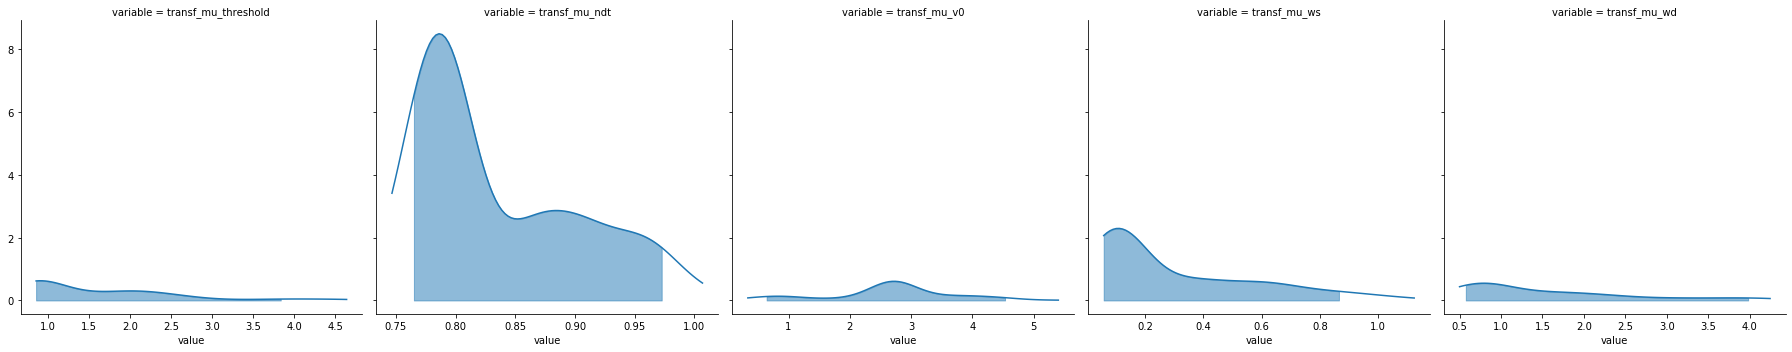

In [12]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

In [13]:
pp_rt, pp_acc = model_fit.get_posterior_predictives(n_posterior_predictives=100)

In [14]:
pp_rt

array([[2.97675151, 2.97775151, 2.97875151, ..., 1.11615968, 1.49215968,
        1.14415968],
       [1.37634757, 1.63434757, 1.07734757, ..., 1.60092911, 1.02192911,
        1.13692911],
       [1.25597503, 1.87897503, 1.17197503, ..., 1.23982784, 1.64982784,
        1.37182784],
       ...,
       [0.99267384, 1.16567384, 1.70067384, ..., 0.70197053, 0.70197053,
        0.70197053],
       [1.64516259, 1.37516259, 1.24216259, ..., 0.69958314, 0.69958314,
        0.70058314],
       [1.50051811, 1.70251811, 1.52451811, ..., 0.70032589, 0.69932589,
        0.69932589]])

In [15]:
pp_acc

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.]])

In [16]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_incorrect,quant_30_rt_incorrect,quant_50_rt_incorrect,quant_70_rt_incorrect,quant_90_rt_incorrect,quant_10_rt_correct,quant_30_rt_correct,quant_50_rt_correct,quant_70_rt_correct,quant_90_rt_correct
sample,,,,,,,,,,,,,
1,0.620306,1.882399,0.452684,1.017250,1.281012,1.591160,2.975752,2.978752,1.056886,1.226386,1.459612,2.973752,2.977752
2,0.698192,1.316847,1.053264,0.981065,1.132571,1.242929,1.419077,1.673096,0.989548,1.154929,1.277403,1.430593,1.726924
3,0.635605,1.345576,1.195317,1.004543,1.194831,1.334901,1.511372,1.779869,0.967269,1.143228,1.264869,1.429461,1.747644
4,0.681502,1.866498,0.470096,1.032780,1.205380,1.372180,2.173982,2.986982,1.036180,1.227534,1.499186,2.978982,2.984982
5,0.645341,1.879566,0.438797,1.033388,1.293539,1.603534,2.973176,2.981176,1.030891,1.219191,1.415912,2.970276,2.979876
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.820584,0.918880,1.906830,0.702963,0.746689,1.050703,1.234703,1.615503,0.702963,0.703963,0.737289,0.750289,1.314403
97,0.828929,0.931608,2.003079,0.705172,0.742399,0.965781,1.202381,1.632781,0.704172,0.705172,0.739399,0.763399,1.371781
98,0.812239,0.929096,1.703086,0.733492,0.745692,1.086674,1.305074,1.695674,0.701971,0.701971,0.736692,0.749692,1.340674


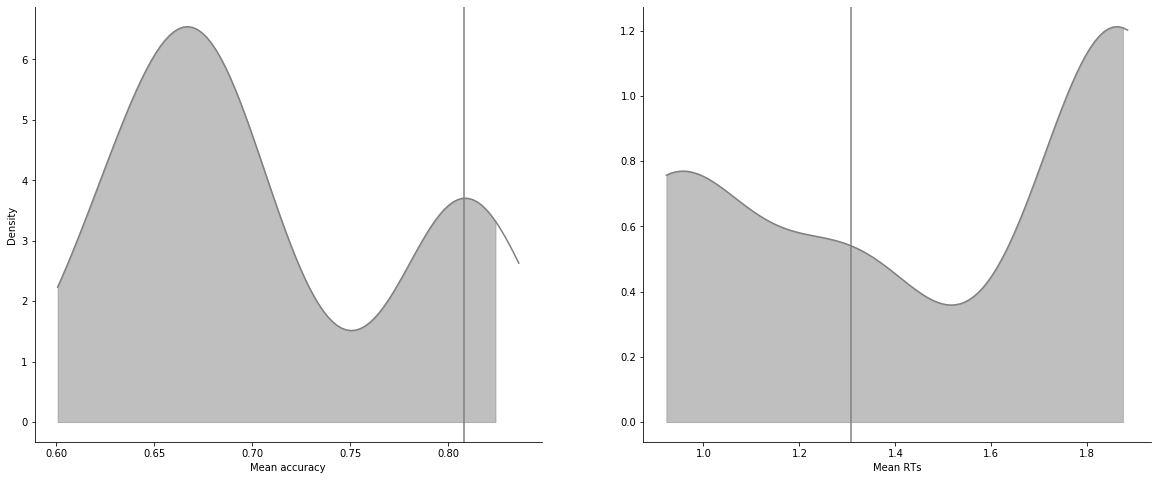

In [17]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

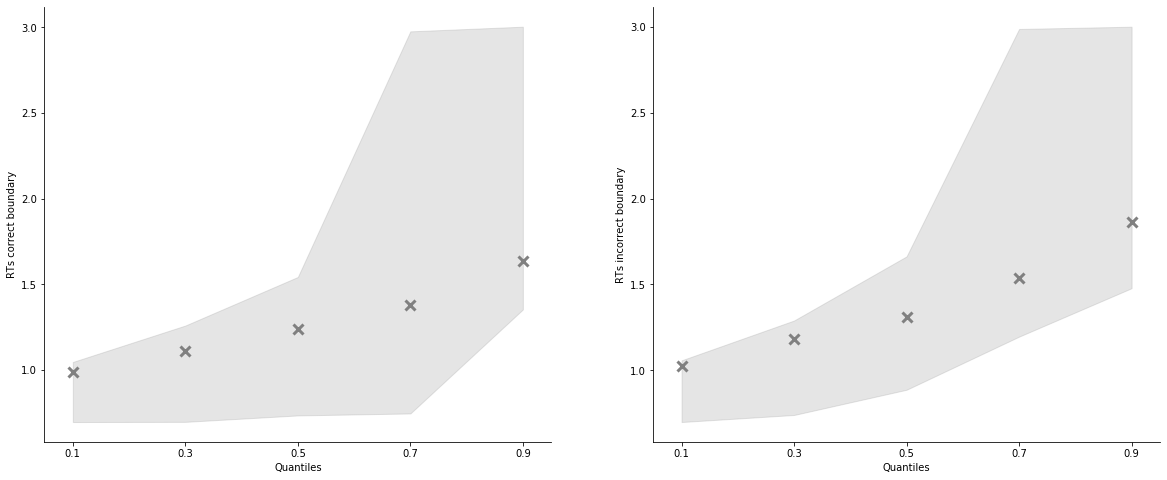

In [18]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

In [19]:
import numpy as np

In [20]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [21]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,S_cor,S_inc,accuracy_rescale,choice_pair,block_bins
0,0,1,1.0,1.0,43.0,39.0,2,1,1.0,1.244082,0.0,43.0,39.0,2,AB,1
1,1,1,1.0,2.0,60.0,50.0,4,3,1.0,1.101821,1.0,60.0,50.0,1,CD,1
2,2,1,1.0,3.0,44.0,36.0,4,2,2.0,1.029923,0.0,44.0,36.0,2,BD,1
3,3,1,1.0,4.0,55.0,55.0,4,3,2.5,1.368007,0.0,55.0,55.0,2,CD,1
4,4,1,1.0,5.0,52.0,49.0,4,3,3.5,1.039329,1.0,52.0,49.0,1,CD,1


In [22]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1.0         AB          1            0.593220  1.961184  0.291175   
                        2            0.728814  1.400393  0.982803   
                        3            0.542373  1.378179  1.058557   
                        4            0.593220  2.013250  0.282925   
                        5            0.542373  1.941826  0.321116   
...                                       ...       ...       ...   
3.0         CD          96           0.716667  0.900452  1.092609   
                        97           0.816667  0.942417  1.700383   
                        98           0.716667  0.940496  1.496160   
                        99           0.716667  0.966790  1.482025   
                        100          0.850000  0.910339  1.263784   

                                quant_30_rt_incorrect  quant_30_rt_correct  \
block_label choice_pair sample                                               
1.0         AB          1                    1.438912             1.322760   
                        2                    1.165638             1.269298   
                        3                    1.191628             1.175756   
                        4                    1.496130             1.330886   
                        5                    1.373285             1.214434   
...                                               ...                  ...   
3.0         CD          96                   0.742089             0.702963   
                        97                   0.741399             0.704172   
                        98                   0.740692             0.701971   
                        99                   0.742824             0.700583   
                        100                  0.743223             0.700326   

                                quant_50_rt_incorrect  quant_50_rt_correct  \
block_label choice_pair sample                                               
1.0         AB          1                    1.813160             1.658612   
                        2                    1.226138             1.416348   
                        3                    1.335975             1.280401   
                        4                    1.805686             1.643180   
                        5                    1.878534             1.493791   
...                                               ...                  ...   
3.0         CD          96                   0.743289             0.738289   
                        97                   0.744399             0.741399   
                        98                   0.744692             0.733692   
                        99                   1.108163             0.736824   
                        100                  0.763423             0.742423   

                                quant_70_rt_incorrect  quant_70_rt_correct  
block_label choice_pair sample                                              
1.0         AB          1                    2.977752             2.855524  
                        2                    1.441612             1.503948  
                        3                    1.490657             1.469572  
                        4                    2.008886             2.982982  
                        5                    2.976776             2.746883  
...                                               ...                  ...  
3.0         CD          96                   1.115703             0.964103  
                        97                   0.961781             1.030381  
                        98                   1.056074             0.848885  
                        99                   1.577563             0.750624  
                        100                  1.064718             0.956518  

[1200 rows x 9 columns]

In [23]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_bins sample                                                             
1          1            0.533333  1.866041  0.533597               1.339012   
           2            0.688889  1.306362  0.993096               1.170471   
           3            0.655556  1.387002  0.930717               1.189828   
           4            0.566667  1.852594  0.482160               1.253286   
           5            0.611111  1.873411  0.471319               1.268539   
...                          ...       ...       ...                    ...   
8          96           0.730337  0.923521  1.216809               0.751889   
           97           0.775281  0.936496  1.607018               0.744099   
           98           0.786517  0.969375  2.888790               0.746692   
           99           0.831461  0.952486  3.209245               0.737024   
           100          0.808989  0.913411  2.175198               0.749023   

                   quant_30_rt_correct  quant_50_rt_incorrect  \
block_bins sample                                               
1          1                  1.238212               1.500160   
           2                  1.117993               1.312348   
           3                  1.153852               1.343828   
           4                  1.174686               1.440180   
           5                  1.220691               1.569534   
...                                ...                    ...   
8          96                 0.703163               1.111703   
           97                 0.704172               0.872590   
           98                 0.701971               1.090674   
           99                 0.700583               0.747824   
           100                0.701326               0.766423   

                   quant_50_rt_correct  quant_70_rt_incorrect  \
block_bins sample                                               
1          1                  1.420386               2.973752   
           2                  1.235429               1.449424   
           3                  1.271975               1.521869   
           4                  1.376686               2.980982   
           5                  1.514534               2.974976   
...                                ...                    ...   
8          96                 0.737289               1.413003   
           97                 0.739399               1.329481   
           98                 0.737192               1.322274   
           99                 0.742324               1.335163   
           100                0.747423               1.030118   

                   quant_70_rt_correct  
block_bins sample                       
1          1                  2.877092  
           2                  1.405122  
           3                  1.490575  
           4                  2.975982  
           5                  2.042891  
...                                ...  
8          96                 0.743089  
           97                 0.752199  
           98                 0.747992  
           99                 0.942763  
           100                0.902090  

[800 rows x 9 columns]

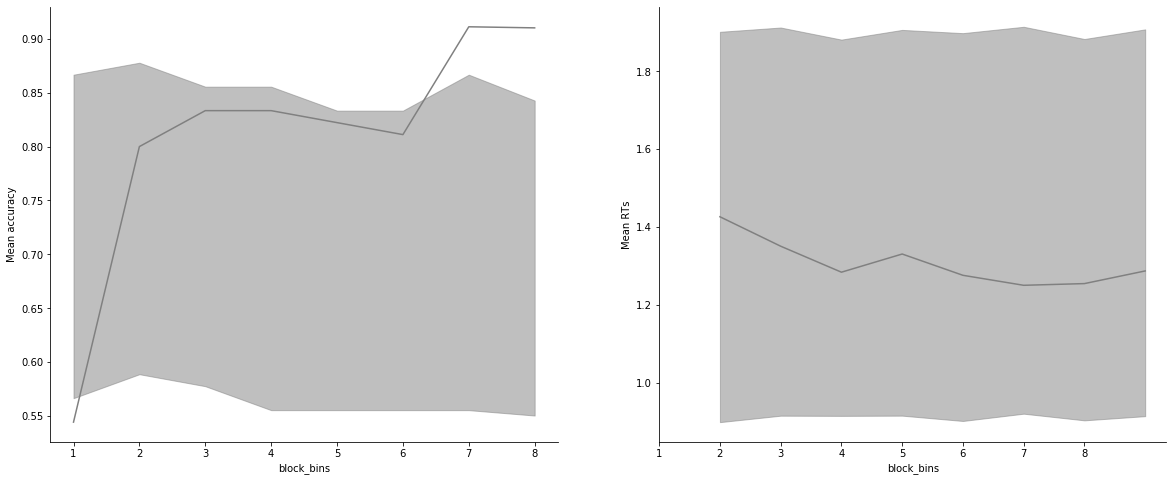

In [24]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

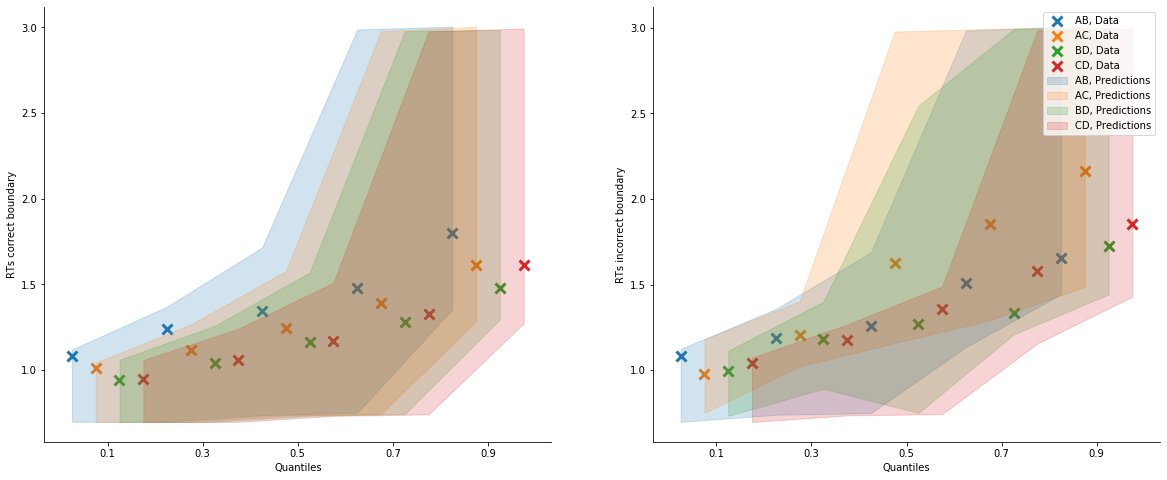

In [25]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);

In [26]:
sv = model_fit.last_values
sv

,chain,draw,warmup,mu_ndt,mu_threshold,mu_v0,mu_wd,mu_ws,sd_ndt,sd_threshold,...,z_threshold[3],z_v0[1],z_v0[2],z_v0[3],z_wd[1],z_wd[2],z_wd[3],z_ws[1],z_ws[2],z_ws[3]
69,0,69,0,0.355382,1.872331,-0.821912,2.118446,-1.623537,0.751442,0.184577,...,-1.467818,0.629002,0.219462,0.205176,-1.563371,-1.775464,-1.675816,-1.900322,-0.701527,-0.769475
139,1,69,0,0.160311,0.323141,2.632041,-0.229499,-2.811160,0.081583,0.817068,...,-0.948566,-0.760905,0.119771,0.210786,-0.854903,-0.083441,1.366183,-1.487776,0.369977,1.677028
